<h1>OkCupid Capstone Project</h1>

In this project, we aim to explore, analyze, and interpret data in an OkCupid dating dataset. The goal of this is to find trends and relationships between different features.

In [75]:
#Import relevant libraries and import csv data
import pandas as pd
import numpy as np
from numpy import nan
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import scale, normalize, StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline


In the following cell, we examine the columns and scope of the data set:

In [2]:
#find the number of columns and examine columns and first five rows
df = pd.read_csv('profiles.csv')
print('The number of rows in this dataset is ' + str(len(df)))
df.info()

The number of rows in this dataset is 59946
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  in

<h2>Age</h2>
Here, we examine the distribution of age over the OkCupid dataset:

In [3]:
#find number of age values:
print('The total number of age values in the data is ' + str(df.age.nunique()))
print('The median age for users is ' + str(df.age.median()) +' years old')
print(df.age.mode())
df = df[df.age < 70]

The total number of age values in the data is 54
The median age for users is 30.0 years old
0    26
dtype: int64


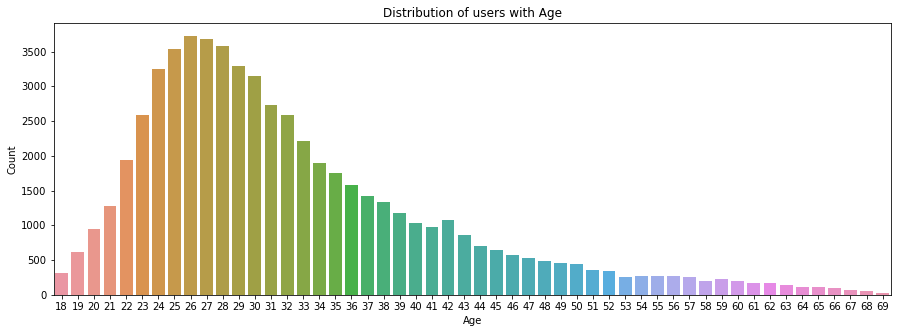

In [4]:
plt.figure(figsize=(15,5))
sns.countplot(
    data=df,
    x='age'
)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of users with Age')
plt.show()

As we can see with the graph above, and with a median age of 30.0 years, OkCupid caters to younger users. The most frequent age of OkCupid users is 26 years old.

<h2>Smoking, Drinks, and Drugs</h2>
In the next section, we will be analyzing smoking, drinking, and drug use data of OkCupid users.

In [5]:
print(df.smokes.value_counts())
print(df.drinks.value_counts())
print(df.drugs.value_counts())
smokes_mapping = {'no': 0, 'sometimes': 1, 'when drinking': 2, 'yes': 3, 'trying to quit': 4}
drinks_mapping = {'not at all': 0, 'rarely': 1,'socially': 2, 'often': 3, 'very often': 4, 'desperately': 5}
drugs_mapping = {'never': 0, 'sometimes': 1, 'often': 2}
df['smokes'] = df.smokes.map(smokes_mapping)
df['drinks'] = df.drinks.map(drinks_mapping)
df['drugs'] = df.drugs.map(drugs_mapping)
df.head()

no                43896
sometimes          3787
when drinking      3039
yes                2231
trying to quit     1480
Name: smokes, dtype: int64
socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64
never        37723
sometimes     7732
often          410
Name: drugs, dtype: int64


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,2.0,0.0,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,1.0,english,single
1,35,average,mostly other,3.0,1.0,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,0.0,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,2.0,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,0.0,"english, french, c++",available
3,23,thin,vegetarian,2.0,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,0.0,"english, german (poorly)",single
4,29,athletic,NaN,2.0,0.0,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,0.0,english,single


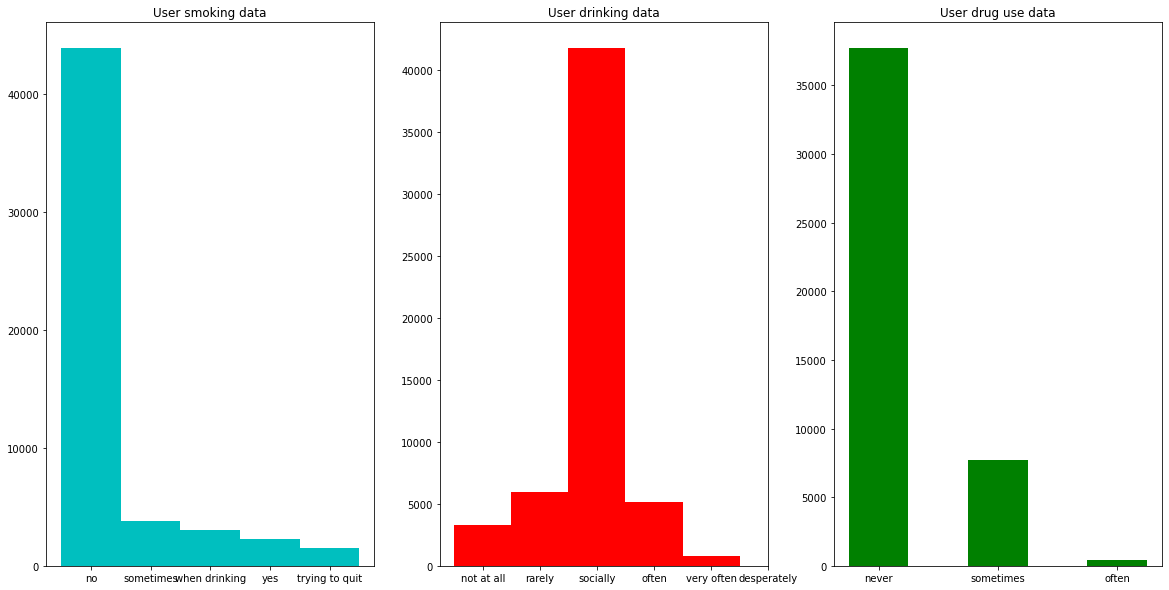

In [6]:
smokes_df = df.dropna(subset=['smokes'])
df['smokes'].head(10)
plt.figure(figsize=(20,10))
ax = plt.subplot(1,3,1)
plt.hist(smokes_df['smokes'], bins=5, color='c')
ax.set_xticks([2/5,6/5,2,14/5,18/5])
ax.set_xticklabels(['no', 'sometimes', 'when drinking', 'yes', 'trying to quit'])
plt.title('User smoking data')

drinks_df = df.dropna(subset=['drinks'])
ax1 = plt.subplot(1,3,2)
plt.hist(drinks_df['drinks'], bins=5, color='r')
ax1.set_xticks([.5,1.5,2.5,3.5,4.5,5.5])
ax1.set_xticklabels(['not at all', 'rarely','socially', 'often', 'very often', 'desperately'])
plt.title('User drinking data')

drugs_df = df.dropna(subset=['drugs'])
ax2 = plt.subplot(1,3,3)
plt.hist(drugs_df['drugs'], bins=5, color='g')
ax2.set_xticks([1/5,1,9/5])
ax2.set_xticklabels(['never', 'sometimes', 'often'])
plt.title('User drug use data')
plt.show()

In the graphs above, we can see the most popular answers among OkCupid users for smoking, drinking, and drug use habits. From this, we can gather how the customer base views each of these habits: Most do not use drugs or smoke, but most users socially consume alcohol.

<h2>Essay Responses</h2>
In the following section, we will examine the essay portions of the profiles.

In [7]:
ess_col = ['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']

all_essay = df[ess_col].replace(np.nan, '', regex=True)
all_essay = all_essay[ess_col].apply(lambda x: ' '.join(x), axis = 1)
df['essay_len'] = all_essay.apply(lambda x: len(x))


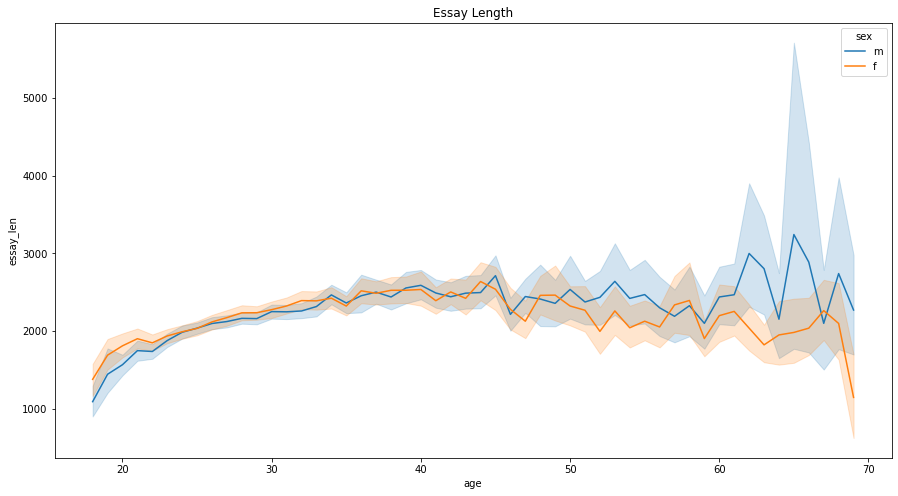

In [8]:
plt.figure(figsize=(15,8))
plt.title('Essay Length')
sns.lineplot(
    data = df,
    y = 'essay_len',
    x = 'age',
    hue='sex'
)
plt.show()

In the following cell, we count the number of times the user uses the word 'i' or 'me'

In [9]:
def i_me_count_func(x):
    count = 0
    for item in x:
        if item == 'i':
            count += 1
        elif item == 'me':
            count += 1
        elif item == 'i,':
            count += 1
        elif item == 'me,':
            count += 1
        elif item == 'i.':
            count += 1
        elif item == 'me.':
            count += 1
        elif item == 'i!':
            count += 1
        elif item == 'me!':
            count += 1
        elif item == 'i?':
            count += 1
        elif item == 'me?':
            count += 1
    return count

df['split_essay'] = all_essay.apply(lambda x: x.split(' '))
df['i_me_count'] = df['split_essay'].apply(lambda x: i_me_count_func(x))

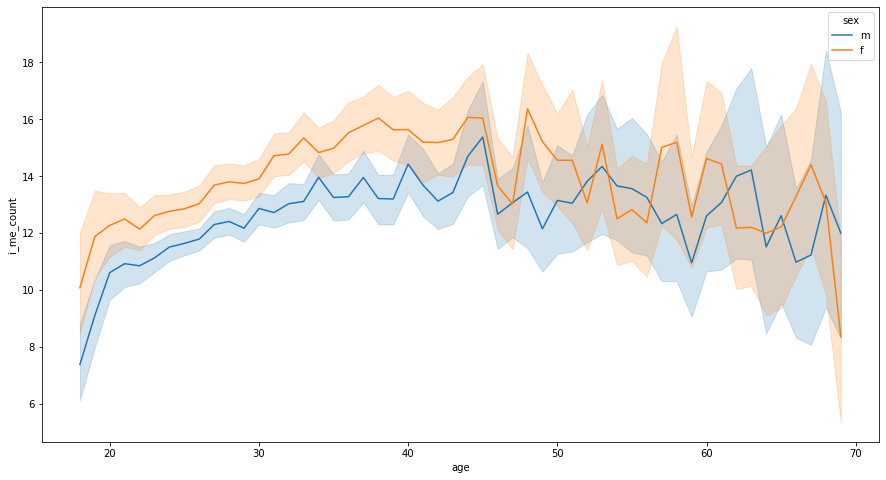

In [10]:
plt.figure(figsize=(15,8))
sns.lineplot(
    data = df,
    x = 'age',
    y = 'i_me_count',
    hue='sex'
)
plt.show()

<h2>Religious Beliefs</h2>
In the following section, we will be examining religious views of OkCupid users.

In [11]:
#examine possible values, and clean data
#print(df.religion.value_counts())
df['rel_cleaned'] = df.religion.str.split().str.get(0)
print(df['rel_cleaned'].value_counts())

agnosticism     8812
other           7742
atheism         6985
christianity    5787
catholicism     4758
judaism         3098
buddhism        1948
hinduism         450
islam            139
Name: rel_cleaned, dtype: int64


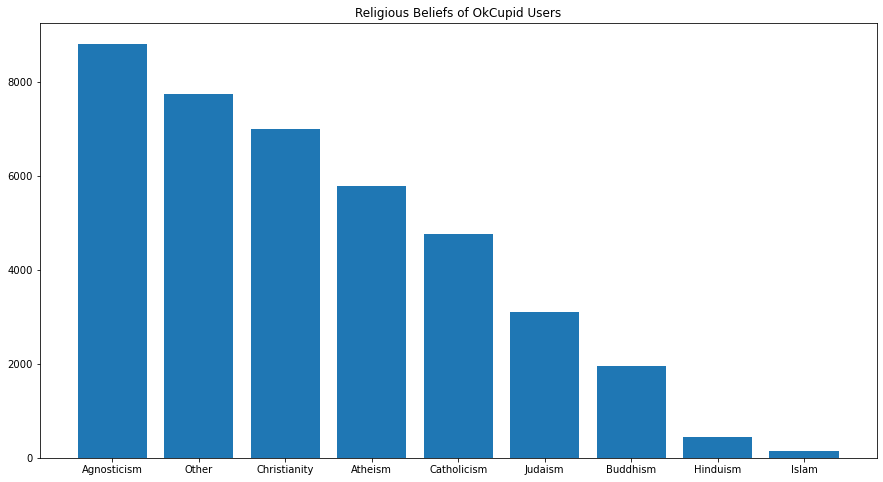

In [12]:
rel_list = ['Agnosticism', 'Other', 'Christianity', 'Atheism', 'Catholicism', 'Judaism', 'Buddhism', 'Hinduism', 'Islam']
plt.figure(figsize=(15,8))
ax = plt.subplot()
plt.title('Religious Beliefs of OkCupid Users')
plt.bar(range(df['rel_cleaned'].nunique()) ,df['rel_cleaned'].value_counts())
ax.set_xticks(range(9))
ax.set_xticklabels(rel_list)
plt.show()

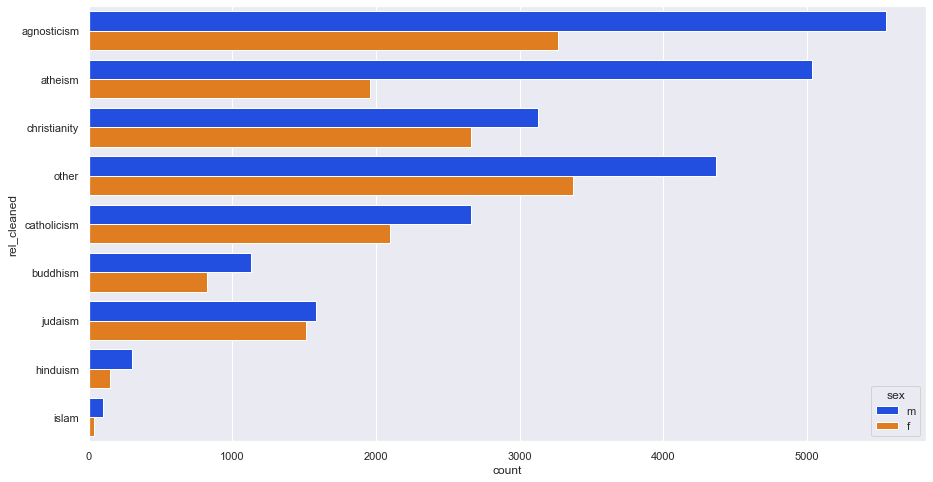

In [13]:
sns.set(palette = 'bright', style='darkgrid', rc={'figure.figsize':(15,8)})
sns.countplot(data=df, y='rel_cleaned', hue='sex')
plt.show()

Here we can see the religious belief distribution. Using this, we will examine religious beliefs and how the correlate with age.

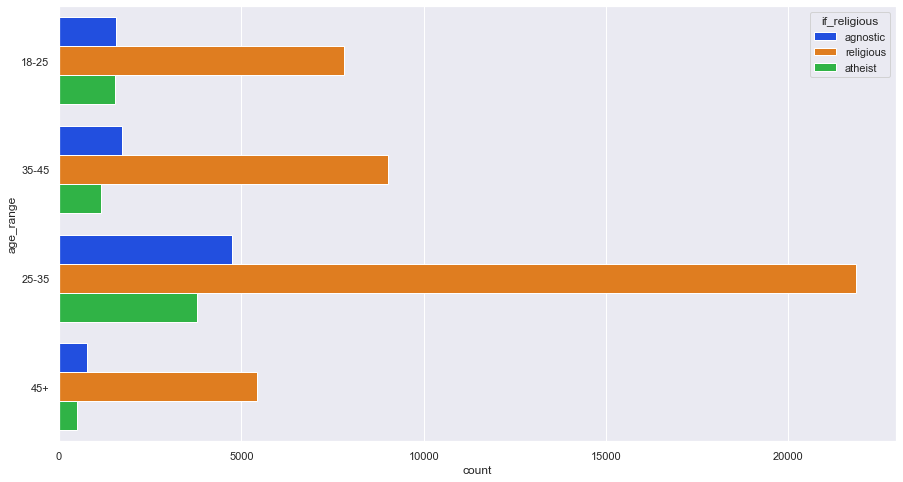

In [14]:
def age_range_func(x):
    if x >= 18 and x < 25:
        return '18-25'
    elif x >= 25 and x < 35:
        return '25-35'
    elif x >= 35 and x < 45:
        return '35-45'
    elif x >= 45:
        return '45+'

def if_religious_func(x):
    if x == 'agnosticism':
        return 'agnostic'
    if x == 'atheism':
        return 'atheist'
    else:
        return 'religious'

df['age_range'] = df.age.apply(lambda x: age_range_func(x))
df['if_religious'] = df['rel_cleaned'].apply(lambda x: if_religious_func(x))
sns.set(palette = 'bright', style='darkgrid', rc={'figure.figsize':(15,8)})
sns.countplot(data=df, y='age_range', hue='if_religious')
plt.show()

Above, we can see the distribution of religious beliefs among the users of OkCupid. We can see above that religous beliefs are far more common than atheism and agnosticism among OkCupid users.

<h2>Income Data</h2>
In the following cells, we examine income data among OkCupid users.

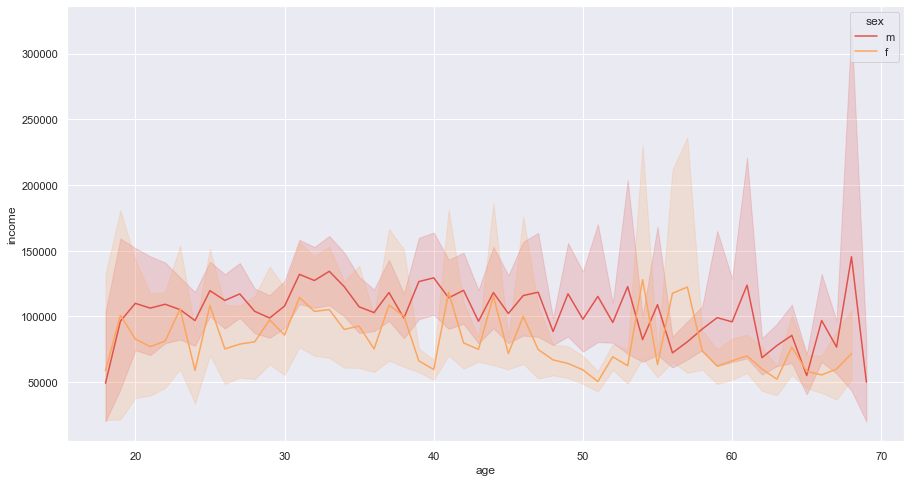

In [15]:
#clean data to remove -1 in income, and null values
age_income_sex_df = df[['age', 'income', 'sex']]
age_income_sex_df = age_income_sex_df.dropna(axis=0)
age_income_sex_df = age_income_sex_df[age_income_sex_df['income'] != -1]
#plot
sns.set(palette = 'Spectral', style='darkgrid', rc={'figure.figsize':(15,8)})
sns.lineplot(
    data = age_income_sex_df,
    x = 'age',
    y = 'income',
    hue = 'sex'
)
plt.show()

Above, we can see that for the large majority of the ages, men out-earn women, with the exceptions of under twenty, and in the mid-fifties.

<h1>Analysis, and Modeling</h1>


<h3>I/Me count and Age</h3>
First,
we will examine if we can find a relationship between age, smoking, drinking, and drugs, and Income. We will then examine if we can predict income from the afforementioned variables.

In [16]:
data = df[['smokes', 'drinks', 'income', 'age_range']]
data = data[data.income != -1]
data = data.dropna(axis=0)
normalized_data = normalize(data[['smokes', 'drinks', 'income']])
knn = KNeighborsClassifier(n_neighbors = 11, weights='distance')
train_data, test_data, train_labels, test_labels = train_test_split(normalized_data, data['age_range'], stratify=data['age_range'])
knn.fit(train_data, train_labels)
pred_labels = knn.predict(test_data)
score = knn.score(test_data, test_labels)
print(score)

0.45952906548933037


Above, we find an accuracy score of ~45%, which, on the surface seems entirely inconclusive. However, we must consider the number of predictor outcomes. In this case, we have four different age ranges, so if the test were fully inconclusive, we would expect an accuracy of 25%. Still, 45% accurate is not enough to be used to predict age range from smoking habits, drinking habits, and income.

<h3>Education Mapping</h3>
Below, we map string variables to integers, such that it can be used in a model:

In [17]:
df['education'].unique()
df['education'].dropna()
education_map = {'working on college/university':1, 'working on space camp':2,
       'graduated from college/university':3, 'working on two-year college':4,
       'graduated from high school':5, 'graduated from space camp':6,
       'graduated from masters program':7, 'dropped out of space camp':8,
       'graduated from ph.d program':9, 'working on masters program':10,
       'graduated from law school':11, 'working on ph.d program':12,
       'two-year college':13, 'working on med school':14,
       'dropped out of college/university':15,
       'graduated from two-year college':16, 'college/university':17,
       'dropped out of high school':18, 'working on high school':19,
       'dropped out of ph.d program':20, 'dropped out of two-year college':21,
       'high school':22, 'graduated from med school':23, 'masters program':24,
       'space camp':25, 'working on law school':26,
       'dropped out of masters program':27, 'ph.d program':28, 'law school':29,
       'dropped out of med school':30, 'dropped out of law school':31,
       'med school':32}
df['education'] = df.education.map(education_map)

<h3>Education, Income, and Sex</h3>
Below, we try to predict Sex based on Education and Income:

In [83]:
#Create new DF, clean, and map values
data = df[['sex', 'education', 'income']]
data = data[data.income != -1]
data = data.dropna(axis=0)
sex_mapping = {'m':0, 'f':1}
data['sex'] = data.sex.map(sex_mapping)
#KNN Classifier initialized, and data normalized
model = KNeighborsClassifier(n_neighbors = 11, weights='distance')
normalized_data = normalize(data[['education', 'income']])
#data split into training and test sets, and model fit
train_data, test_data, train_labels, test_labels = train_test_split(normalized_data, data['sex'])
model.fit(train_data, train_labels)
pred_income = model.predict(test_data)
#print score
print(model.score(test_data, test_labels))

0.712166172106825


Above, we see that a K-Neighbors Classifier scores ~71% trying to predict sex, given education and income.

<h3>Diet</h3>
In the cells below, data is cleaned and prepared using pandas. Next, we use a pipeline to scale data and apply a K-Nearest Neighbors Classifier to attempt to predict diet from user body type, age, sex, and drinking habits.

In [22]:
def diet_func(x):
    if 'anything' in x:
        return 'anything'
    elif 'kosher' in x:
        return 'kosher'
    elif 'vegetarian' in x:
        return 'vegetarian'
    elif 'vegan' in x:
        return 'vegan'
    elif 'halal' in x:
        return 'halal'
    else:
        return 'other'


data = df[['body_type', 'diet', 'age', 'sex', 'drinks']]
body_type_map = {'average':1, 'thin':2, 'skinny':3, 'athletic':4, 'curvy':5, 'fit':6,
       'a little extra':7, 'jacked':8, 'overweight':9, 'full figured':10,
       'used up':11}
data = data[data.body_type != 'rather not say']
data = data[data.age < 70]
data['body_type'] = data.body_type.map(body_type_map)
data['diet'] = data.diet.apply(lambda x: diet_func(str(x)))
diet_map = {'anything':1, 'vegetarian':2, 'vegan':3, 'halal':4, 'kosher':5, 'other':6}
data['diet'] = data.diet.map(diet_map)
data['sex'] = data.sex.map(sex_mapping)
data_clean = data.dropna(axis=0)


In [85]:
x = data_clean[['body_type', 'age', 'sex', 'drinks']]
y = data_clean['diet']
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=11))]
pipeline = Pipeline(steps)
train_data, test_data, train_labels, test_labels = train_test_split(x, y, stratify=y)
knn_scaled = pipeline.fit(train_data, train_labels)
pred_labels = pipeline.predict(test_data)
print(accuracy_score(test_labels, pred_labels))

0.4778272211140095
1    26139
6    20727
2     4488
3      610
5      105
4       67
Name: diet, dtype: int64


With this KNN Classifier, we find an accuracy of ~47% with trying to predict the diet of a user given their body type, age, sex, and drinking habits. This accuracy was not largely impacted by using a scaler function.